In [239]:
import sys
sys.path.append('../')

from pprint import pprint

from src.utils import yaml_utils
from src.utils import box_converters as box_conv

import os
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [240]:
from src.common.dataset_config import DATASETS_METADATA_PATH

In [241]:
datasets_meta = yaml_utils.open_yaml(DATASETS_METADATA_PATH)

In [260]:
pprint(datasets_meta['safety_vest'])

{'annotations_directory': 'labels',
 'annotations_format': 'YOLO',
 'channels': 'BGR',
 'classes': {0: 'capacete',
             1: 'colete_refletivo',
             2: 'sem_capacete',
             3: 'sem_colete_refletivo'},
 'classes_ratio': {0: 1889, 1: 542, 2: 2080, 3: 809},
 'download_link': 'None',
 'folder_name': 'safety_vest',
 'images_directory': 'images',
 'name': 'Safety vest - v4 Computer Vision Project',
 'source_link': 'https://universe.roboflow.com/work-safe-project/safety-vest---v4/dataset/2/download'}


In [267]:
chv_ds_path = '../data/safety_vest'
chv_ds_images_path = os.path.join(chv_ds_path, 'images')
chv_ds_annots_path = os.path.join(chv_ds_path, 'labels')

In [268]:
images_names = sorted(os.listdir(chv_ds_images_path))
labels_names = sorted(os.listdir(chv_ds_annots_path))

In [269]:
def plot_annotated_image(imgs_path, annts_path, imgs_nms, lbls_nms, n):
    img_p = os.path.join(imgs_path, imgs_nms[n])
    lbl_p = os.path.join(annts_path, lbls_nms[n])
    img_array = cv2.imread(img_p)
    img_h, img_w, _ = img_array.shape
    with open(lbl_p, 'r') as annots_file:
        annots = annots_file.readlines()
    for annot in annots:
        u = annot[:-1].split(' ')
        clss = u[0]
        x_center, y_center = float(u[1]), float(u[2])
        b_width, b_height = float(u[3]), float(u[4])
        left_x, top_y, right_x, botom_y = box_conv.convert_annot_xywh2xyxy(
            x_center, y_center, b_width, b_height, img_w, img_h)
        cv2.rectangle(img_array, (left_x, top_y), (right_x, botom_y),
                      (0, 255, 255), 4)
        cv2.putText(img_array, clss, (left_x, botom_y),
                    1, 7, (255, 0, 0), 2)
    _ = plt.imshow(img_array)

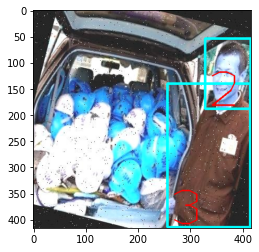

In [270]:
plot_annotated_image(
    chv_ds_images_path, chv_ds_annots_path,
    images_names, labels_names, 12)

In [271]:
def count_classes_ratio(annts_path, lbls_nms):
    dict_count = defaultdict(int)
    for i in range(len(lbls_nms)):
        lbl_p = os.path.join(annts_path, lbls_nms[i])
        with open(lbl_p, 'r') as annots_file:
            annots = annots_file.readlines()
        for cl_j in map(lambda x: int(x[0]), annots):
            dict_count[cl_j] += 1
    s = sorted(dict_count.items(), key=lambda x: x[0])
    for cl, amount in s:
        print(f'{cl}: {amount}')

In [272]:
count_classes_ratio(chv_ds_annots_path, labels_names)

0: 1889
1: 542
2: 809
3: 2080
